# GNN for hockey prediction

In [ ]:
import pandas as pd
import torch
from torch_geometric.data import download_url, extract_zip

game_path = '/work/game.xlsx'
team_path = '/work/team.xlsx'
player_path = '/work/player.xlsx'



In [ ]:
games = pd.read_excel(game_path)
teams = pd.read_excel(team_path)
players = pd.read_excel(player_path)

# Create matchups

In [ ]:
from itertools import combinations

num_matchups = 3
total_teams = 10
pp_team = 6
# Create a list of teams
teams = list(range(total_teams))

# find all possible matchups between the teams
matchups = list(combinations(teams, 2))

# duplicate the matchups
schedule = matchups * num_matchups

# Sort the schedule
schedule.sort()
edge_L1 = torch.tensor(schedule).flatten()
print(edge_L1.size())
edge_L1


torch.Size([270])


tensor([0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 0, 3, 0, 3, 0, 3, 0, 4, 0, 4, 0, 4,
        0, 5, 0, 5, 0, 5, 0, 6, 0, 6, 0, 6, 0, 7, 0, 7, 0, 7, 0, 8, 0, 8, 0, 8,
        0, 9, 0, 9, 0, 9, 1, 2, 1, 2, 1, 2, 1, 3, 1, 3, 1, 3, 1, 4, 1, 4, 1, 4,
        1, 5, 1, 5, 1, 5, 1, 6, 1, 6, 1, 6, 1, 7, 1, 7, 1, 7, 1, 8, 1, 8, 1, 8,
        1, 9, 1, 9, 1, 9, 2, 3, 2, 3, 2, 3, 2, 4, 2, 4, 2, 4, 2, 5, 2, 5, 2, 5,
        2, 6, 2, 6, 2, 6, 2, 7, 2, 7, 2, 7, 2, 8, 2, 8, 2, 8, 2, 9, 2, 9, 2, 9,
        3, 4, 3, 4, 3, 4, 3, 5, 3, 5, 3, 5, 3, 6, 3, 6, 3, 6, 3, 7, 3, 7, 3, 7,
        3, 8, 3, 8, 3, 8, 3, 9, 3, 9, 3, 9, 4, 5, 4, 5, 4, 5, 4, 6, 4, 6, 4, 6,
        4, 7, 4, 7, 4, 7, 4, 8, 4, 8, 4, 8, 4, 9, 4, 9, 4, 9, 5, 6, 5, 6, 5, 6,
        5, 7, 5, 7, 5, 7, 5, 8, 5, 8, 5, 8, 5, 9, 5, 9, 5, 9, 6, 7, 6, 7, 6, 7,
        6, 8, 6, 8, 6, 8, 6, 9, 6, 9, 6, 9, 7, 8, 7, 8, 7, 8, 7, 9, 7, 9, 7, 9,
        8, 9, 8, 9, 8, 9])

# Create matches

In [ ]:
match_id = []
for current in range(len(schedule)):
    match_id.append(current)
    match_id.append(current)

edge_R1 = torch.tensor(match_id)
print(edge_R1.size())
edge_R1


torch.Size([270])


tensor([  0,   0,   1,   1,   2,   2,   3,   3,   4,   4,   5,   5,   6,   6,
          7,   7,   8,   8,   9,   9,  10,  10,  11,  11,  12,  12,  13,  13,
         14,  14,  15,  15,  16,  16,  17,  17,  18,  18,  19,  19,  20,  20,
         21,  21,  22,  22,  23,  23,  24,  24,  25,  25,  26,  26,  27,  27,
         28,  28,  29,  29,  30,  30,  31,  31,  32,  32,  33,  33,  34,  34,
         35,  35,  36,  36,  37,  37,  38,  38,  39,  39,  40,  40,  41,  41,
         42,  42,  43,  43,  44,  44,  45,  45,  46,  46,  47,  47,  48,  48,
         49,  49,  50,  50,  51,  51,  52,  52,  53,  53,  54,  54,  55,  55,
         56,  56,  57,  57,  58,  58,  59,  59,  60,  60,  61,  61,  62,  62,
         63,  63,  64,  64,  65,  65,  66,  66,  67,  67,  68,  68,  69,  69,
         70,  70,  71,  71,  72,  72,  73,  73,  74,  74,  75,  75,  76,  76,
         77,  77,  78,  78,  79,  79,  80,  80,  81,  81,  82,  82,  83,  83,
         84,  84,  85,  85,  86,  86,  87,  87,  88,  88,  89,  

# Create players and matches to team

In [ ]:
def assign_players_to_teams(num_players, num_teams):
    # Initialize 
    player_ids = []
    team_assignments = []
    
    # Calculate number of players per team
    players_per_team = num_players // num_teams
    
    # Assign players to teams
    for team in range(num_teams):
        for player in range(players_per_team):
            player_id = team * players_per_team + player
            player_ids.append(player_id)
            team_assignments.append(team)
    
    return player_ids, team_assignments


L2, R2 = assign_players_to_teams(pp_team*total_teams, total_teams)
edge_L2 = torch.tensor(L2)
edge_R2 = torch.tensor(R2)
edge_L2

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59])

# Set home/away 

In [ ]:
import random

def select_random_from_pairs(input_list):
    # even number of elements
    if len(input_list) % 2 != 0:
        return "Input list must contain an even number of elements."

    selected_elements = []

    # Iterate over pairs
    for i in range(0, len(input_list), 2):
        pair = input_list[i:i+2]
        # Randomly select one
        selected_element = int(random.choice(pair))
        selected_elements.append(selected_element)

    return selected_elements

# Given input list

# Select randomly from each pair
locations = (torch.tensor(select_random_from_pairs(edge_L1)).view(-1,1)).float()
locations

tensor([[1.],
        [0.],
        [1.],
        [0.],
        [2.],
        [2.],
        [3.],
        [0.],
        [0.],
        [0.],
        [4.],
        [0.],
        [0.],
        [5.],
        [5.],
        [0.],
        [6.],
        [0.],
        [0.],
        [7.],
        [0.],
        [0.],
        [8.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [2.],
        [2.],
        [1.],
        [1.],
        [3.],
        [1.],
        [4.],
        [1.],
        [5.],
        [1.],
        [1.],
        [1.],
        [1.],
        [6.],
        [7.],
        [1.],
        [1.],
        [1.],
        [8.],
        [8.],
        [9.],
        [9.],
        [9.],
        [3.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [5.],
        [6.],
        [6.],
        [6.],
        [7.],
        [7.],
        [7.],
        [8.],
        [2.],
        [2.],
        [2.],
        [2.],
      

# Generate team data

In [ ]:
import numpy as np

# Given average data
# average_data = [45.0, 45.0, 350.0, 220.0, 30.0]
average_data = [1, 1, 1, 1, 1]
team_feat = len(average_data)
# standard deviation of %  Gaussian distribution
std_devs = [mean * 0.3 for mean in average_data]

# Generate following a Gaussian
num_sets = total_teams

generated_data_sets = []

# Generate data sets
for i in range(num_sets):
    generated_data = [abs(np.random.normal(mean, std)) for mean, std in zip(average_data, std_devs)]
    generated_data_sets.append(generated_data)

team_stats = (torch.tensor(generated_data_sets)).float()
team_stats

tensor([[0.7491, 0.8097, 0.8739, 1.4425, 1.1399],
        [0.7293, 1.2538, 0.1909, 1.0231, 0.9049],
        [1.0483, 0.7700, 0.9078, 0.9156, 1.0196],
        [1.0011, 1.1155, 0.7227, 1.5101, 1.2892],
        [0.5607, 1.4561, 1.1568, 1.0876, 0.9796],
        [1.1602, 0.9653, 0.8030, 0.9368, 1.2830],
        [0.8533, 1.1411, 1.3158, 0.5521, 1.2123],
        [1.1416, 1.0900, 1.2372, 0.5076, 1.3260],
        [0.4311, 0.7211, 1.5656, 0.6170, 0.3746],
        [1.4342, 0.7907, 0.5491, 0.9393, 0.5431]])

# create player stats

In [ ]:
import numpy as np

# Given average data
average_data_player = [1, 1, 1 ]
player_feat = len(average_data_player)
# gaussian for stats
std_devs_player = [mean * 0.5 for mean in average_data_player]

# Generate more 
num_sets_player = total_teams*pp_team

generated_data_sets_player = []

# Generate data sets
for i in range(num_sets_player):
    generated_data_player = [abs(np.random.normal(mean, std)) for mean, std in zip(average_data_player, std_devs_player)]
    generated_data_sets_player.append(generated_data_player)

player_stats = (torch.tensor(generated_data_sets_player)).float()
player_stats

tensor([[1.0891, 1.5285, 1.8453],
        [1.5631, 0.6202, 1.4597],
        [1.3139, 0.9439, 0.4173],
        [1.0941, 0.8059, 0.5178],
        [1.0331, 0.9363, 0.2410],
        [0.5986, 1.5922, 1.7631],
        [1.9308, 0.1996, 1.0934],
        [1.7440, 0.7309, 1.0441],
        [0.6397, 0.6298, 0.5180],
        [0.6933, 0.9368, 1.2436],
        [1.1743, 0.3053, 0.8585],
        [0.7641, 1.3749, 0.8696],
        [1.5115, 0.6629, 0.7559],
        [0.8922, 0.9680, 1.7117],
        [1.1511, 1.4070, 2.5788],
        [1.3886, 1.0971, 0.7794],
        [0.2030, 0.8767, 1.1428],
        [0.4253, 1.1202, 0.9573],
        [1.3211, 1.8825, 0.6296],
        [1.0758, 0.9336, 1.1209],
        [1.4300, 0.7560, 1.0562],
        [0.6855, 0.3808, 1.0516],
        [1.8451, 0.7931, 0.9115],
        [0.6858, 1.5541, 1.1821],
        [2.0444, 1.1068, 1.5784],
        [1.4250, 0.6346, 1.2639],
        [0.6852, 1.3235, 1.0167],
        [1.4772, 0.7498, 0.2259],
        [0.4705, 0.8793, 0.1823],
        [0.906

# create wins/losses

In [ ]:
# probability based on goals for / goals against
win_loss = []
for game in schedule:
    team1, team2 = game
    #print(team1, team2)
    gf1 = team_stats[team1][0]
    gf2 = team_stats[team2][0]
    win_ratio = ((gf1)/(gf1+gf2))
    outcome = 1 if random.random() < win_ratio else 0
    win_loss.append(outcome)


# player to player

In [ ]:
def rearrange_list(input_list, group_size):
    output_list = []
    input_list = input_list.tolist()
    for i in range(0, len(input_list), group_size):
        # Check if has enough to form a complete group
        if i + group_size - 1 < len(input_list):
            # Rearrange
            group = [input_list[i + group_size - 1]] + input_list[i:i + group_size - 1]
            output_list.extend(group)
        else:
            # For the remaining elements 
            output_list.extend(input_list[i:i + group_size])
    return output_list

edge_R4 = torch.tensor(rearrange_list(edge_L2,pp_team))
type(edge_R4)
edge_R4

tensor([ 5,  0,  1,  2,  3,  4, 11,  6,  7,  8,  9, 10, 17, 12, 13, 14, 15, 16,
        23, 18, 19, 20, 21, 22, 29, 24, 25, 26, 27, 28, 35, 30, 31, 32, 33, 34,
        41, 36, 37, 38, 39, 40, 47, 42, 43, 44, 45, 46, 53, 48, 49, 50, 51, 52,
        59, 54, 55, 56, 57, 58])

# Heterograph creation 

In [ ]:
from torch_geometric.data import HeteroData
data = HeteroData()

data['game'].x = locations # location of game
data['team'].x =  team_stats #stats - GF, GA, SF, SA,PIM, 
data['player'].x = player_stats

data['game'].y = torch.tensor(win_loss)

data['team', 'plays_in', 'game'].edge_index = torch.stack([edge_L1, edge_R1])
data['player', 'plays_for', 'team'].edge_index = torch.stack([edge_L2, edge_R2])
#data['team', 'owns', 'player'].edge_index = torch.stack([edge_R2, edge_L2])
data['player','plays_with','player'].edge_index= torch.stack([edge_L2, edge_R4])

node_types, edge_types = data.metadata()
data.metadata
#torch.stack([edge_L2, edge_R4])

<bound method HeteroData.metadata of HeteroData(
  game={
    x=[135, 1],
    y=[135],
  },
  team={ x=[10, 5] },
  player={ x=[60, 3] },
  (team, plays_in, game)={ edge_index=[2, 270] },
  (player, plays_for, team)={ edge_index=[2, 60] },
  (player, plays_with, player)={ edge_index=[2, 60] }
)>

# Training masks

In [ ]:
import torch


def generate_masks(num_nodes, split_ratios=(0.7, 0.15, 0.15)):
    # Shuffle 
    indices = torch.randperm(num_nodes)
    
    # Calculate split sizes
    train_end = int(split_ratios[0] * num_nodes)
    val_end = train_end + int(split_ratios[1] * num_nodes)
    
    # Create masks
    train_mask = torch.zeros(num_nodes, dtype=torch.bool)
    val_mask = torch.zeros(num_nodes, dtype=torch.bool)
    test_mask = torch.zeros(num_nodes, dtype=torch.bool)
    
    train_mask[indices[:train_end]] = True
    val_mask[indices[train_end:val_end]] = True
    test_mask[indices[val_end:]] = True
    
    return train_mask, val_mask, test_mask

# Generate masks 
num_games = data['game'].x.size(0)
num_teams = data['team'].x.size(0)
num_players = data['player'].x.size(0)

game_train_mask, game_val_mask, game_test_mask = generate_masks(num_games)
team_train_mask, team_val_mask, team_test_mask = generate_masks(num_teams)
player_train_mask, player_val_mask, player_test_mask = generate_masks(num_players)

# Assign masks
data['game'].train_mask = game_train_mask
data['game'].val_mask = game_val_mask
data['game'].test_mask = game_test_mask

data['team'].train_mask = team_train_mask
data['team'].val_mask = team_val_mask
data['team'].test_mask = team_test_mask

data['player'].train_mask = player_train_mask
data['player'].val_mask = player_val_mask
data['player'].test_mask = player_test_mask


In [ ]:
import torch_geometric.transforms as T
from torch_geometric.datasets import OGB_MAG
from torch_geometric.nn import SAGEConv, to_hetero

# Build GNN

In [ ]:
import torch
from torch.nn import Linear
from torch_geometric.nn import SAGEConv, to_hetero

class GNN(torch.nn.Module):
    def __init__(self, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = SAGEConv((-1, -1), hidden_channels, aggr='mean')
        self.conv2 = SAGEConv((-1, -1), out_channels, aggr='mean')
        self.lin = Linear(out_channels, 1)  # Assuming binary classification

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index).relu()
        x = self.lin(x)
        return torch.sigmoid(x)  # Output probability for binary classification

model = GNN(hidden_channels=64, out_channels=32)
model = to_hetero(model, metadata=data.metadata(), aggr='sum')


# Training

In [ ]:
import torch.nn.functional as F
from torch.optim import Adam

optimizer = Adam(model.parameters(), lr=0.01)

def train(data):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    out = model(data.x_dict, data.edge_index_dict)
    
    # Compute loss only for game nodes
    loss = F.binary_cross_entropy(out['game'], data['game'].y.float().view(-1, 1))
    
    # Backward pass and optimize
    loss.backward()
    optimizer.step()
    
    return loss.item()

# Example Training Loop
for epoch in range(200):  
    loss = train(data)
    if epoch % 10 == 0:
        print(f'Epoch {epoch} | Loss: {loss}')

Epoch 0 | Loss: 0.8052840828895569
Epoch 10 | Loss: 0.6741957068443298
Epoch 20 | Loss: 0.666578471660614
Epoch 30 | Loss: 0.6626721620559692
Epoch 40 | Loss: 0.6582138538360596
Epoch 50 | Loss: 0.6498271822929382
Epoch 60 | Loss: 0.6428003311157227
Epoch 70 | Loss: 0.6341837644577026
Epoch 80 | Loss: 0.6256226897239685
Epoch 90 | Loss: 0.6145074367523193
Epoch 100 | Loss: 0.6003888845443726
Epoch 110 | Loss: 0.5830018520355225
Epoch 120 | Loss: 0.5649067163467407
Epoch 130 | Loss: 0.5489749908447266
Epoch 140 | Loss: 0.5363847613334656
Epoch 150 | Loss: 0.5226772427558899
Epoch 160 | Loss: 0.5106986165046692
Epoch 170 | Loss: 0.5033935904502869
Epoch 180 | Loss: 0.4858306348323822
Epoch 190 | Loss: 0.47713154554367065


# win/loss predictions

In [ ]:

model.eval()  # Set evaluation mode
with torch.no_grad():  # Disable gradient computation
    probabilities = model(data.x_dict, data.edge_index_dict)['game']
confidence_win = probabilities  # confidence that the game is a win
confidence_loss = 1 - probabilities  #  confidence that the game is a loss
for i, prob in enumerate(probabilities):
    print(f"Game {i+1}: Win Confidence = {prob.item():.2f}, Loss Confidence = {(1-prob).item():.2f}")


Game 1: Win Confidence = 0.43, Loss Confidence = 0.57
Game 2: Win Confidence = 0.02, Loss Confidence = 0.98
Game 3: Win Confidence = 0.43, Loss Confidence = 0.57
Game 4: Win Confidence = 0.99, Loss Confidence = 0.01
Game 5: Win Confidence = 0.36, Loss Confidence = 0.64
Game 6: Win Confidence = 0.36, Loss Confidence = 0.64
Game 7: Win Confidence = 0.82, Loss Confidence = 0.18
Game 8: Win Confidence = 0.94, Loss Confidence = 0.06
Game 9: Win Confidence = 0.94, Loss Confidence = 0.06
Game 10: Win Confidence = 0.47, Loss Confidence = 0.53
Game 11: Win Confidence = 0.84, Loss Confidence = 0.16
Game 12: Win Confidence = 0.47, Loss Confidence = 0.53
Game 13: Win Confidence = 0.94, Loss Confidence = 0.06
Game 14: Win Confidence = 0.46, Loss Confidence = 0.54
Game 15: Win Confidence = 0.46, Loss Confidence = 0.54
Game 16: Win Confidence = 0.73, Loss Confidence = 0.27
Game 17: Win Confidence = 0.60, Loss Confidence = 0.40
Game 18: Win Confidence = 0.73, Loss Confidence = 0.27
Game 19: Win Confid

In [ ]:
def evaluate(data, mask_type='val'):
    model.eval()  # Setevaluation mode
    with torch.no_grad():  # No gradients needed
 
        out = model(data.x_dict, data.edge_index_dict)
        
        # Apply the mask 
        if mask_type == 'val':
            mask = data['game'].val_mask
        elif mask_type == 'test':
            mask = data['game'].test_mask
        else:
            raise ValueError("mask_type must be 'val' or 'test'")
        
        out_eval = out['game'][mask]  # Select only the outputs
        y_eval = data['game'].y[mask].float().view(-1, 1)  # Corresponding labels 
        
        # Compute loss
        loss = F.binary_cross_entropy(out_eval, y_eval)
        

        preds = out_eval.round()  # Round probabilities 
        correct = preds.eq(y_eval.view_as(preds)).sum().item()  # Count correct
        total = mask.sum().item()  # Total 
        accuracy = correct / total
        
    return loss.item(), accuracy

val_loss, val_accuracy = evaluate(data, 'val')
test_loss, test_accuracy = evaluate(data, 'test')

print(f'Validation Loss: {val_loss} | Validation Accuracy: {val_accuracy}')
print(f'Test Loss: {test_loss} | Test Accuracy: {test_accuracy}')


Validation Loss: 0.5465290546417236 | Validation Accuracy: 0.7
Test Loss: 0.5298659205436707 | Test Accuracy: 0.7142857142857143


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils.convert import to_networkx


/root/venv/lib/python3.9/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


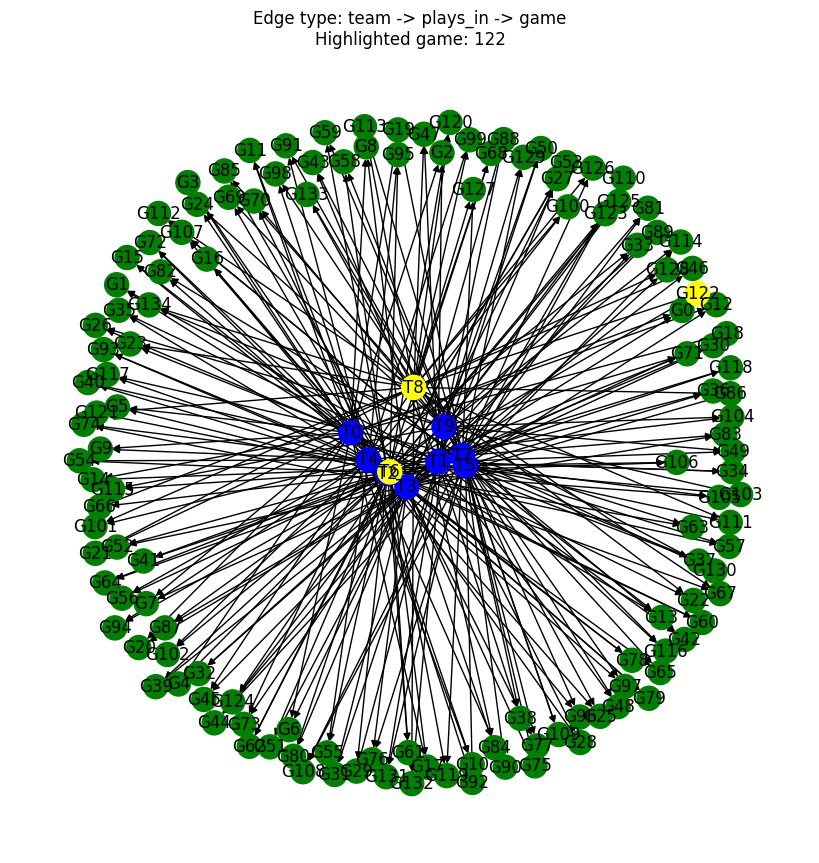

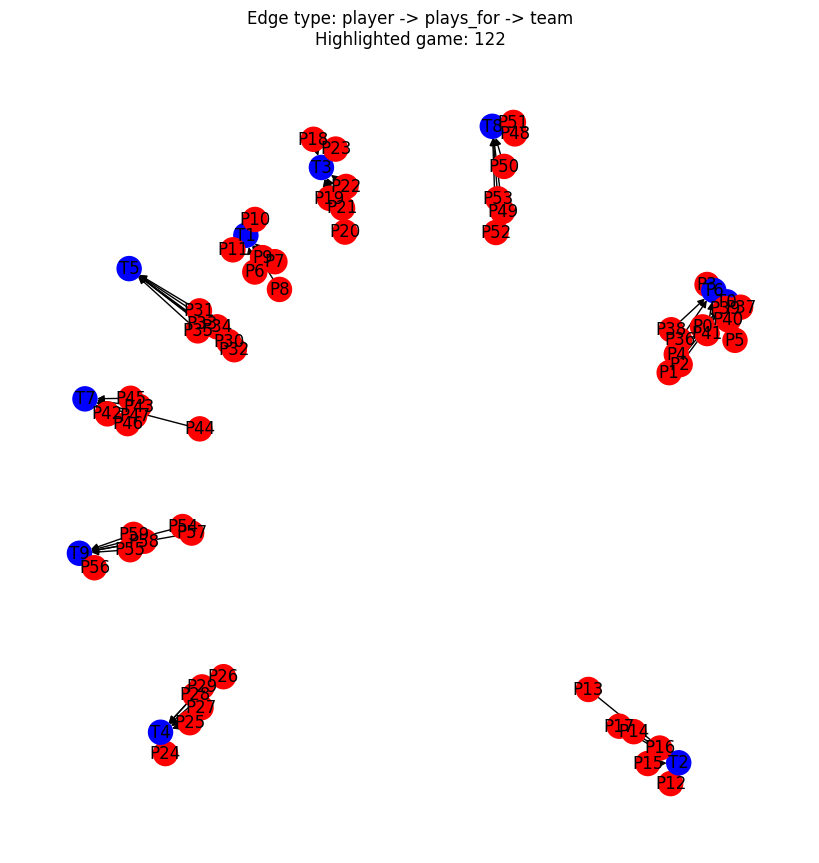

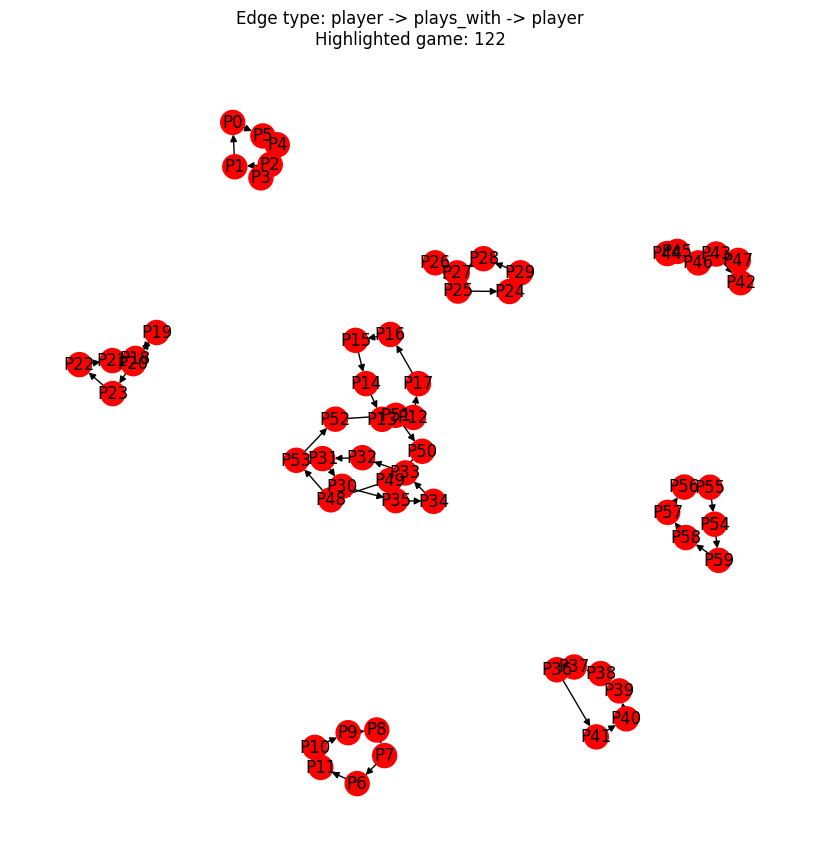

In [ ]:
def visualize_hetero_graph_with_prefix(data, edge_type, highlight_game=None):
    edge_index = data[edge_type].edge_index.cpu().numpy()
    nx_data = nx.DiGraph()
    node_colors = {}
    highlight_colors = {}
    
   
    for start_node, end_node in edge_index.T:
        # differentiate between node types
        start_prefix = 'G' if edge_type[0] == 'game' else ('T' if edge_type[0] == 'team' else 'P')
        end_prefix = 'G' if edge_type[2] == 'game' else ('T' if edge_type[2] == 'team' else 'P')
        start_node = start_prefix + str(start_node)
        end_node = end_prefix + str(end_node)
        nx_data.add_node(start_node)
        nx_data.add_node(end_node)
        nx_data.add_edge(start_node, end_node)
        
        # different color to different node types
        if start_prefix == 'T':
            node_colors[start_node] = 'blue'
        elif start_prefix == 'P':
            node_colors[start_node] = 'red'
        else:
            node_colors[start_node] = 'green'

        if end_prefix == 'T':
            node_colors[end_node] = 'blue'
        elif end_prefix == 'P':
            node_colors[end_node] = 'red'
        else:
            node_colors[end_node] = 'green'
        
        # different color to highlighted nodes
        if (highlight_game is not None and
            ((edge_type[0] == 'game' and start_node == 'G' + str(highlight_game)) or
             (edge_type[2] == 'game' and end_node == 'G' + str(highlight_game)))):  # If the current edge involves the game to be highlighted
            highlight_colors[start_node] = 'yellow'
            highlight_colors[end_node] = 'yellow'
    
    # Update colors 
    node_colors.update(highlight_colors)

    plt.figure(figsize=(8, 8))
    pos = nx.spring_layout(nx_data, seed=42)
    nx.draw(nx_data, pos, with_labels=True, node_color=list(node_colors.values()), cmap='viridis')


edge_types = [
    ("team", "plays_in", "game"),
    ("player", "plays_for", "team"),
    ("player", "plays_with", "player")
]

# Visualize / highlighjt
highlight_game = 122
for edge_type in edge_types:
    visualize_hetero_graph_with_prefix(data, edge_type, highlight_game)
    title = " -> ".join(edge_type)
    plt.title(f"Edge type: {title}\nHighlighted game: {highlight_game}")
    plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7cc43087-41c0-4e7e-9771-a67e619565cb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>